In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np



In [3]:

datal = 'data/adult.data'
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", 
    "marital-status", "occupation", "relationship", "race", "sex", 
    "capital-gain", "capital-loss", "hours-per-week", "native-country", 'salary' ]
data = pd.read_csv(datal, names = column_names)
data.head(5)

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

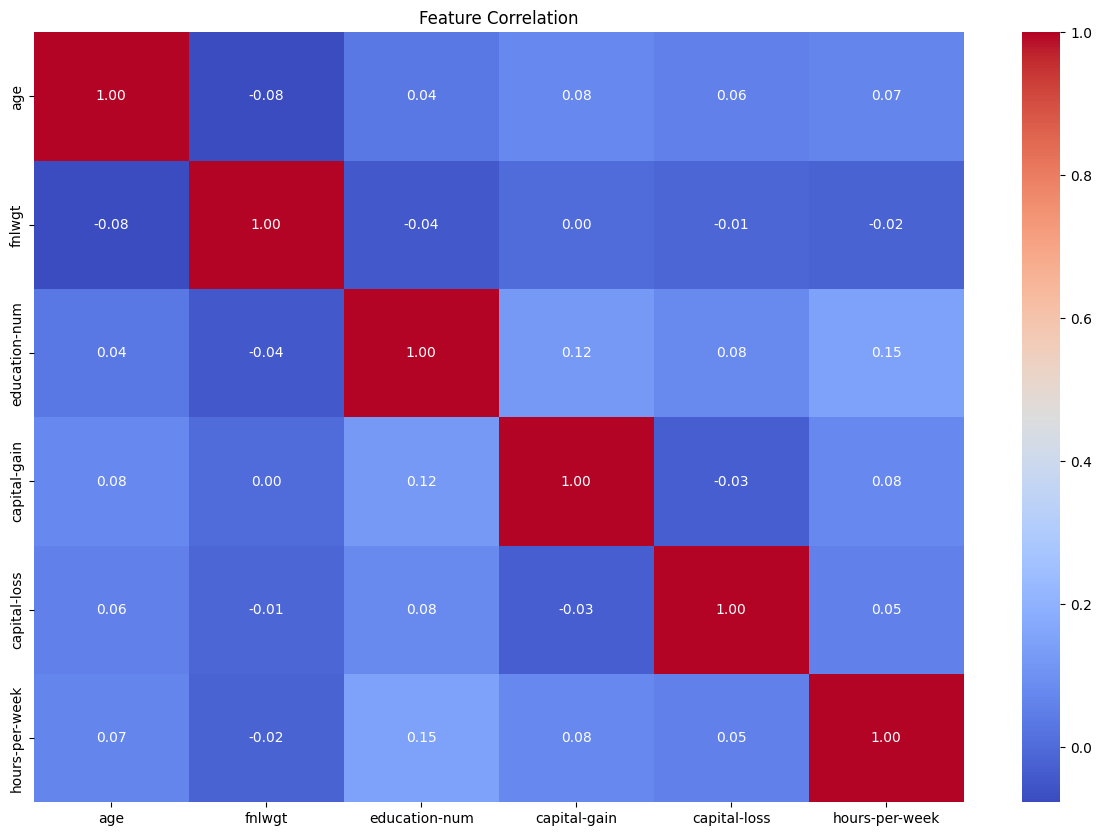

In [4]:

numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show() 


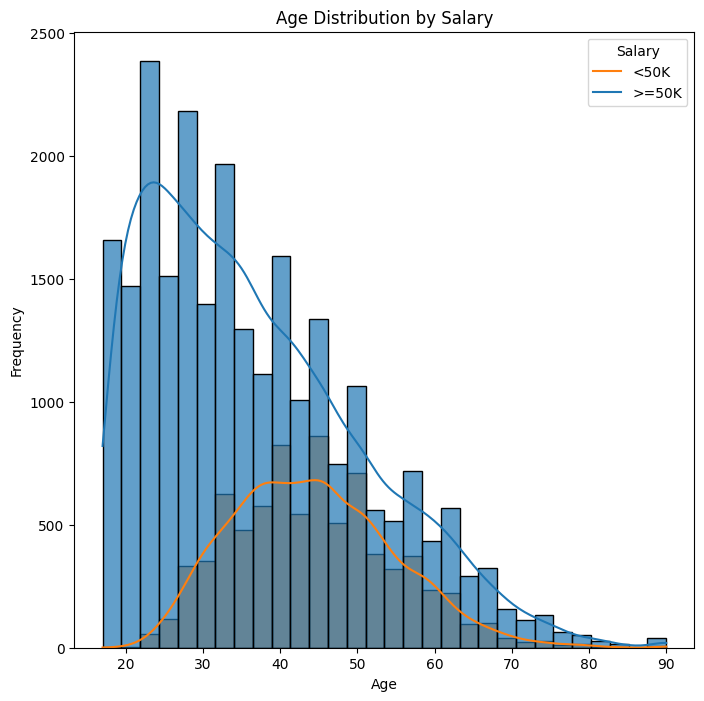

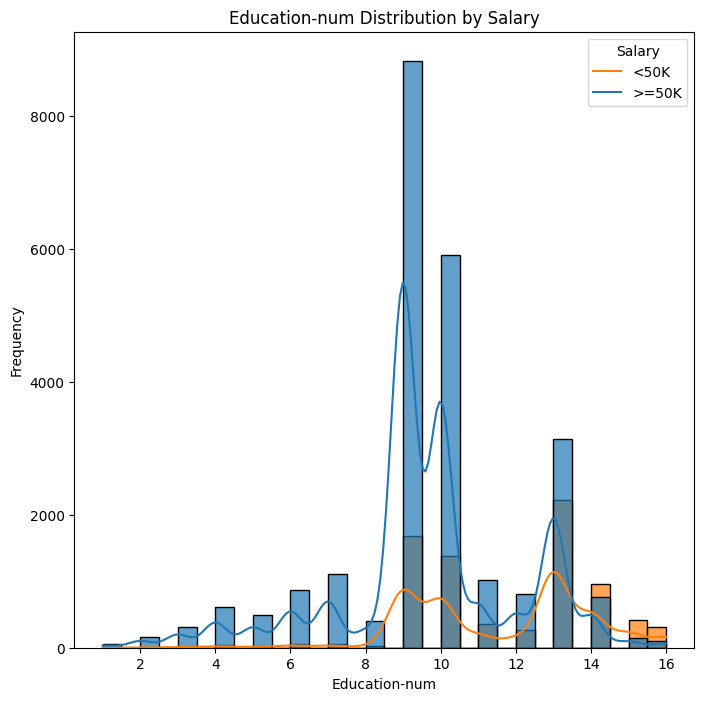

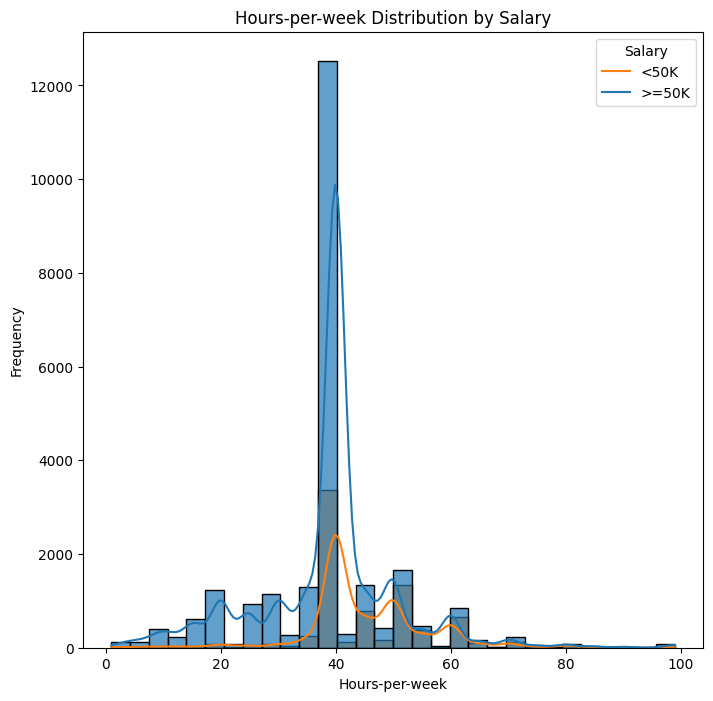

In [5]:

features = ["age", "education-num", "hours-per-week"]
for feature in features:
    plt.figure(figsize=(8, 8))
    sns.histplot(data=data, x=feature, hue="salary", kde=True, bins=30, alpha=0.7)
    plt.title(f"{feature.capitalize()} Distribution by Salary")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Frequency")
    plt.legend(title="Salary", labels=["<50K", ">=50K"],
               loc="upper right")  
    
    plt.show()


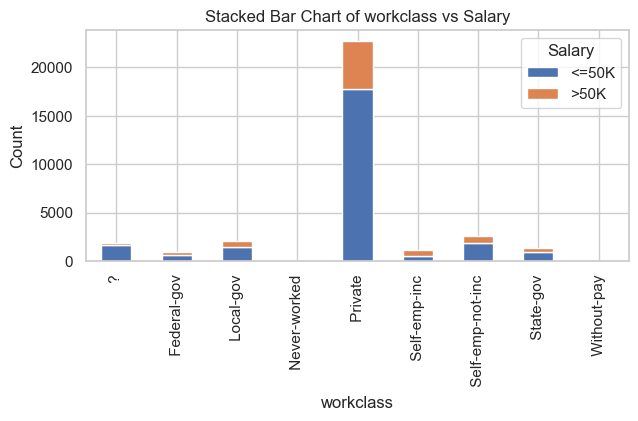

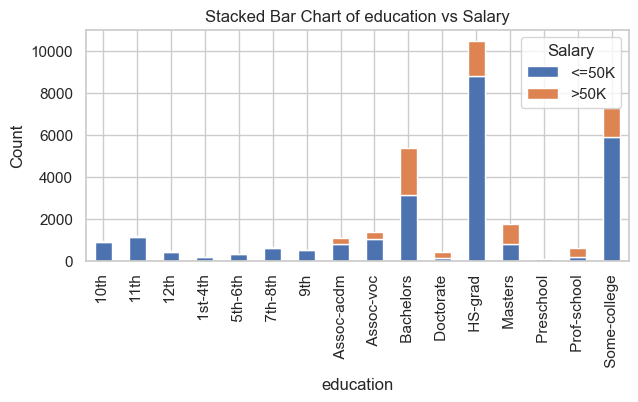

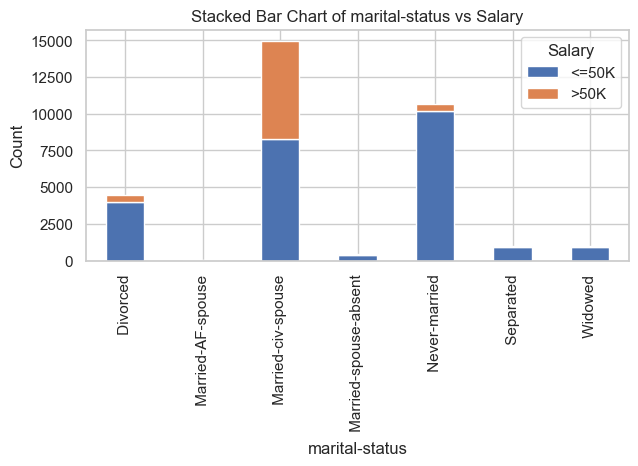

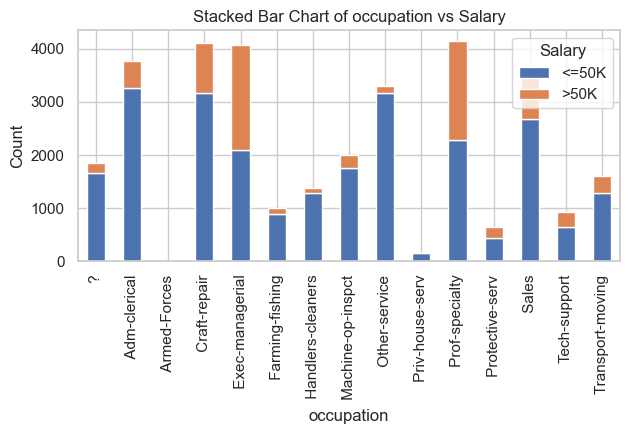

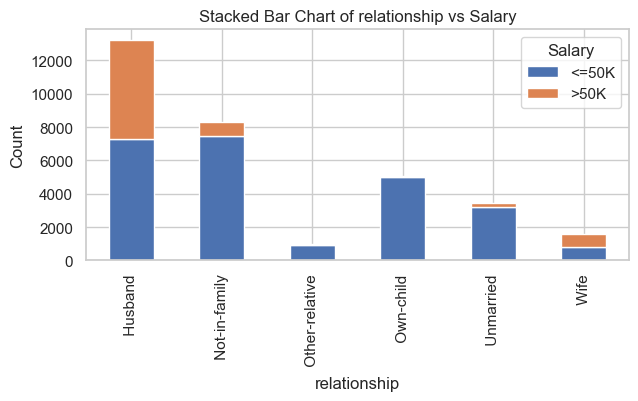

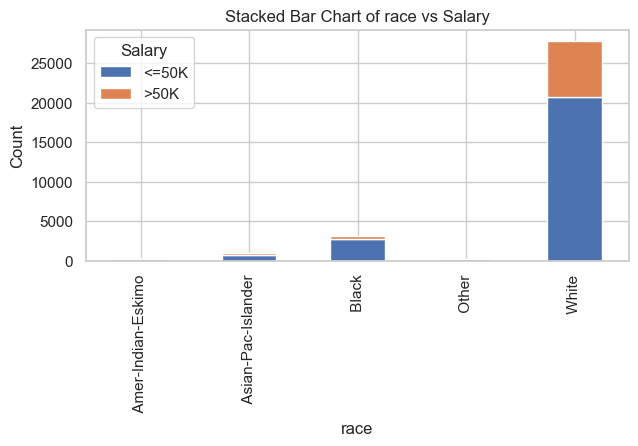

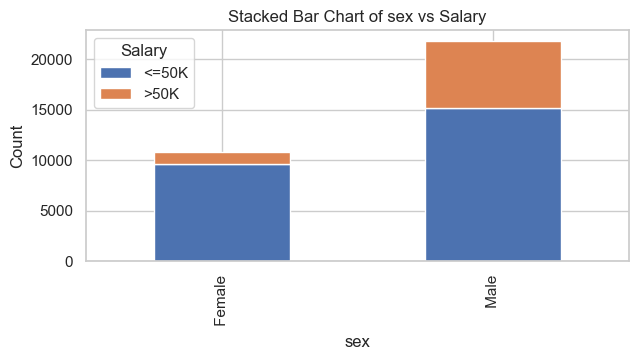

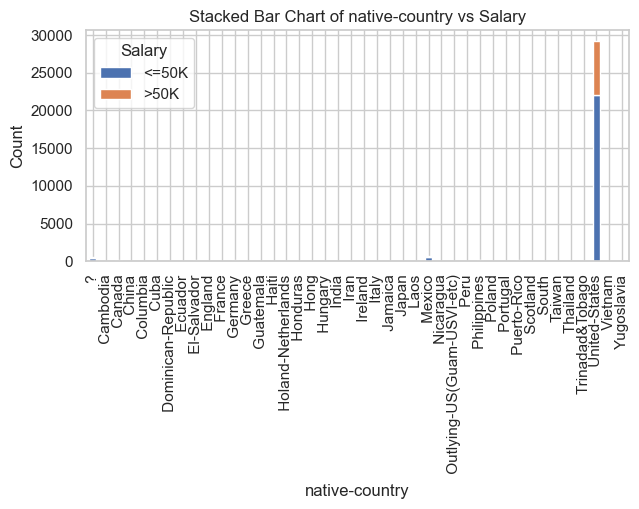

In [134]:

categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


for feature in categorical_features:

    cross_tab = pd.crosstab(data[feature], data['salary'])
    

    cross_tab.plot(kind='bar', stacked=True, figsize=(7, 3))
    

    plt.title(f'Stacked Bar Chart of {feature} vs Salary')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Salary', labels=['<=50K', '>50K'])
    

    plt.show()




In [8]:

country_to_continent = {
    ' Cambodia': 'Asia',
    ' England': 'Europe',
    ' United-States': 'United States',
    ' Puerto-Rico': 'North America',
    ' Canada': 'North America',
    ' Germany': 'Europe',
    ' Outlying-US(Guam-USVI-etc)': 'North America',
    ' India': 'Asia',
    ' Japan': 'Asia',
    ' Greece': 'Europe',
    ' South': 'Africa', 
    ' China': 'Asia',
    ' Cuba': 'North America',
    ' Iran': 'Asia',
    ' Honduras': 'North America',
    ' Philippines': 'Asia',
    ' Italy': 'Europe',
    ' Poland': 'Europe',
    ' Jamaica': 'North America',
    ' Vietnam': 'Asia',
    ' Mexico': 'North America',
    ' Portugal': 'Europe',
    ' Ireland': 'Europe',
    ' France': 'Europe',
    ' Dominican-Republic': 'North America',
    ' Laos': 'Asia',
    ' Ecuador': 'South America',
    ' Taiwan': 'Asia',
    ' Haiti': 'North America',
    ' Columbia': 'South America',
    ' Hungary': 'Europe',
    ' Guatemala': 'North America',
    ' Nicaragua': 'North America',
    ' Scotland': 'Europe',
    ' Thailand': 'Asia',
    ' Yugoslavia': 'Europe',
    ' El-Salvador': 'North America',
    ' Trinadad&Tobago': 'North America',
    ' Peru': 'South America',
    ' Hong': 'Asia',  
    ' Holand-Netherlands': 'Europe'
}



In [28]:
data["native-country"].unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [9]:
def map_continent(country):
    try:
        return country_to_continent[country]
    except KeyError:
        return "Unknown"

data["Continent"] = data["native-country"].apply(map_continent)


In [58]:
map_continent(data['native-country'].iloc[2])

'United States'

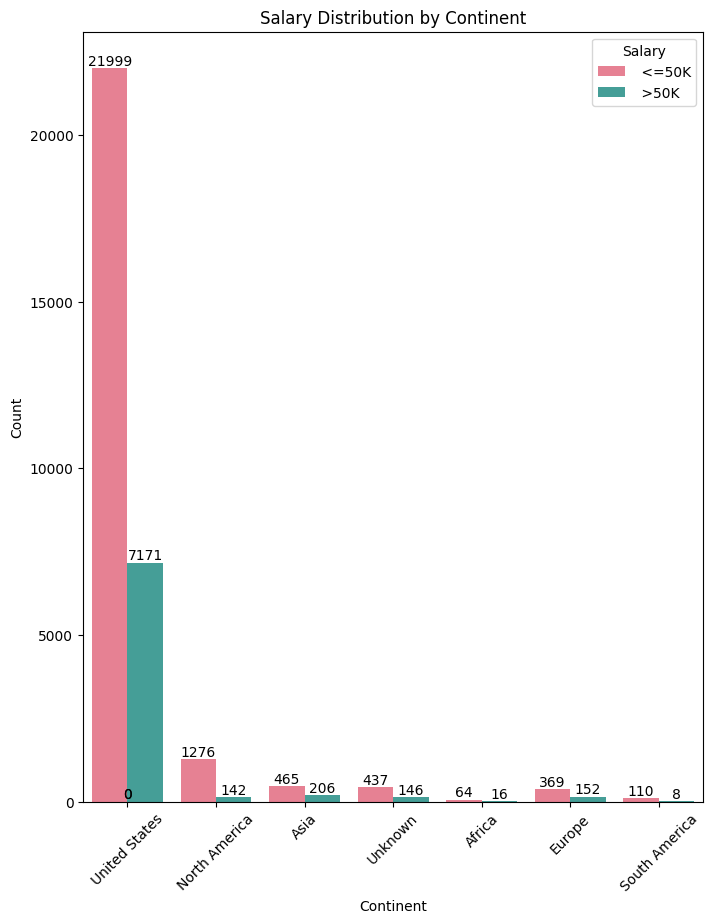

In [10]:


plt.figure(figsize=(8, 10))
sns.countplot(x='Continent', hue='salary', data=data, palette='husl')

# Add text labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.title('Salary Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.legend(title='Salary', loc='upper right')
plt.xticks(rotation=45)
plt.show()



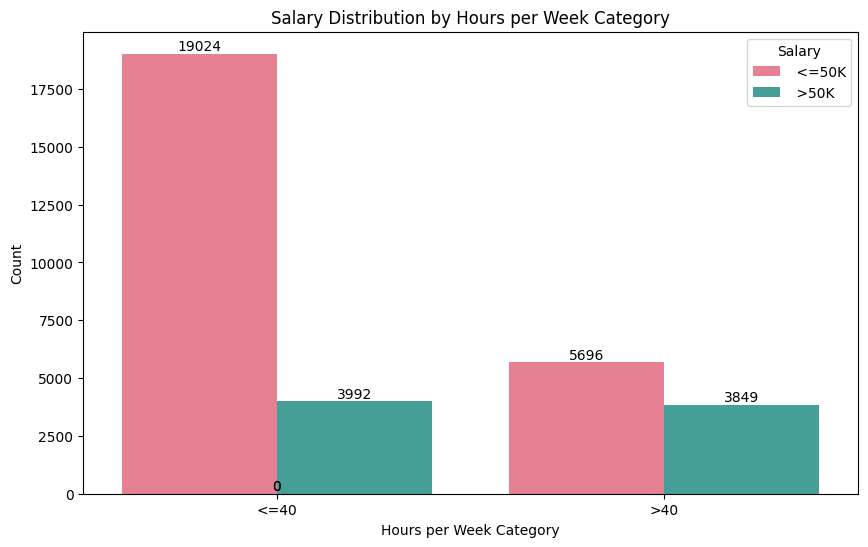

In [63]:

data['hours_category'] = pd.cut(data['hours-per-week'], bins=[0, 41, np.inf], labels=['<=40', '>40'])

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='hours_category', hue='salary', data=data, palette='husl')

# Add text labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.title('Salary Distribution by Hours per Week Category')
plt.xlabel('Hours per Week Category')
plt.ylabel('Count')
plt.legend(title='Salary', loc='upper right')
plt.xticks(rotation=0)
plt.show()


In [68]:
data['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

(<Figure size 1000x1400 with 3 Axes>,
 {(' White', ' <=50K'): (0.0, 0.0, 0.6101953695700817, 0.6976313093183779),
  (' White', ' >50K'): (0.0,
   0.7601313093183779,
   0.6101953695700817,
   0.23986869068162206),
  (' Black', ' <=50K'): (0.6816239409986531,
   0.0,
   0.06853071378116678,
   0.8213628361075545),
  (' Black', ' >50K'): (0.6816239409986531,
   0.8838628361075545,
   0.06853071378116678,
   0.1161371638924456),
  (' Asian-Pac-Islander', ' <=50K'): (0.8215832262083913,
   0.0,
   0.02279238528125235,
   0.6884624639076035),
  (' Asian-Pac-Islander', ' >50K'): (0.8215832262083913,
   0.7509624639076035,
   0.02279238528125235,
   0.24903753609239657),
  (' Amer-Indian-Eskimo', ' <=50K'): (0.9158041829182152,
   0.0,
   0.006822359790634724,
   0.8289790996784566),
  (' Amer-Indian-Eskimo', ' >50K'): (0.9158041829182152,
   0.8914790996784566,
   0.006822359790634724,
   0.10852090032154336),
  (' Other', ' <=50K'): (0.9940551141374212,
   0.0,
   0.005944885862578797,
   0

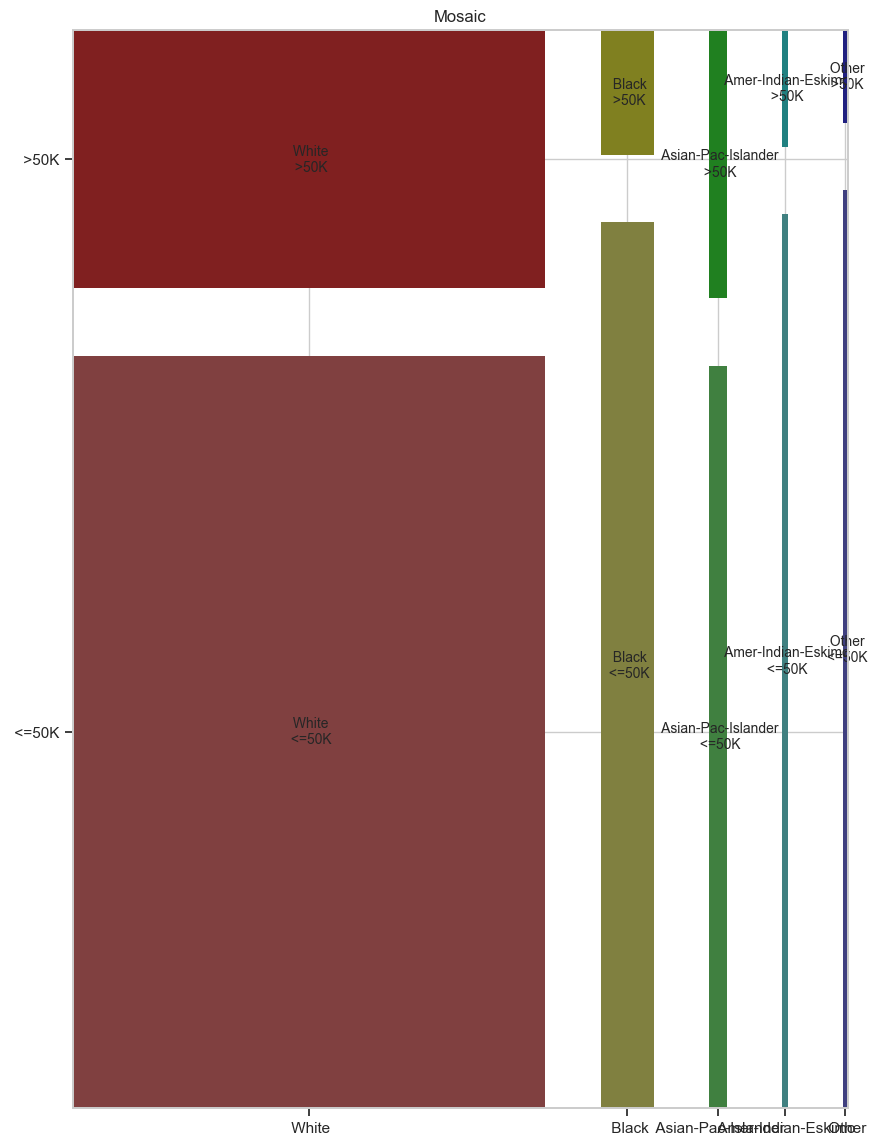

In [89]:
from statsmodels.graphics.mosaicplot import mosaic

fig, ax = plt.subplots(figsize=(10, 14))
mosaic(data, ['race','salary'], title='Mosaic', gap=0.1, ax=ax)


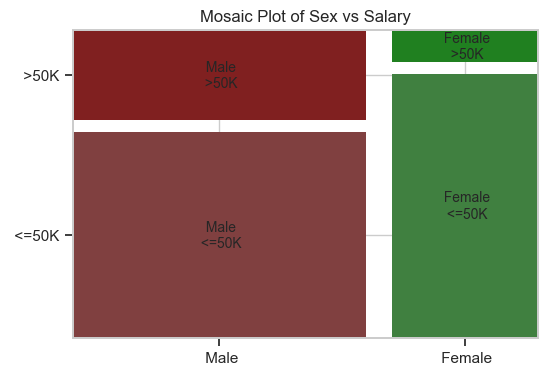

In [131]:
fig, ax = plt.subplots(figsize=(6, 4))
mosaic(data, ['sex','salary'], title='Mosaic Plot of Sex vs Salary', gap=0.06, ax=ax)
plt.show()

In [83]:
data['salary']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: salary, Length: 32561, dtype: object

In [93]:
data['salary'].describe()

count      32561
unique         2
top        <=50K
freq       24720
Name: salary, dtype: object

In [100]:

data['salary_binary'] = (data['salary'] == ' >50K').astype(int)

# Numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])
numerical_corr = numerical_features.corrwith(data['salary_binary'])

# Display correlations with numerical features
print("Correlation with numerical features:\n", numerical_corr)



Correlation with numerical features:
 age               0.234037
fnlwgt           -0.009463
education-num     0.335154
capital-gain      0.223329
capital-loss      0.150526
hours-per-week    0.229689
salary_binary     1.000000
dtype: float64


In [103]:
# Categorical features
categorical_features = data.select_dtypes(include=['object'])

# One-hot encode categorical features
categorical_features_encoded = pd.get_dummies(categorical_features)

# Concatenate one-hot encoded categorical features with 'salary_binary'
data_encoded = pd.concat([categorical_features_encoded, data['salary_binary']], axis=1)

# Calculate correlations with categorical features
categorical_corr = data_encoded.corr()['salary_binary']

# Sort correlations in descending order
categorical_corr_sorted = categorical_corr.sort_values(ascending=False)

# Display sorted correlations
print("Correlation with categorical features (sorted):\n", categorical_corr_sorted)



Correlation with categorical features (sorted):
 salary_binary                         1.000000
salary_ >50K                          1.000000
marital-status_ Married-civ-spouse    0.444696
relationship_ Husband                 0.401035
sex_ Male                             0.215980
                                        ...   
relationship_ Not-in-family          -0.188497
sex_ Female                          -0.215980
relationship_ Own-child              -0.228532
marital-status_ Never-married        -0.318440
salary_ <=50K                        -1.000000
Name: salary_binary, Length: 105, dtype: float64


In [105]:
categorical_corr_sorted[:10]

salary_binary                         1.000000
salary_ >50K                          1.000000
marital-status_ Married-civ-spouse    0.444696
relationship_ Husband                 0.401035
sex_ Male                             0.215980
occupation_ Exec-managerial           0.214861
occupation_ Prof-specialty            0.185866
education_ Bachelors                  0.180485
education_ Masters                    0.174570
education_ Prof-school                0.154907
Name: salary_binary, dtype: float64

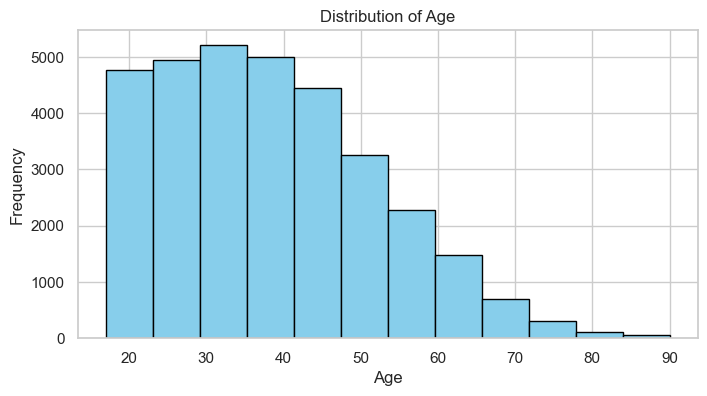

In [133]:
plt.figure(figsize=(8, 4))
plt.hist(data['age'], bins=12, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)
plt.show()

In [121]:
data['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

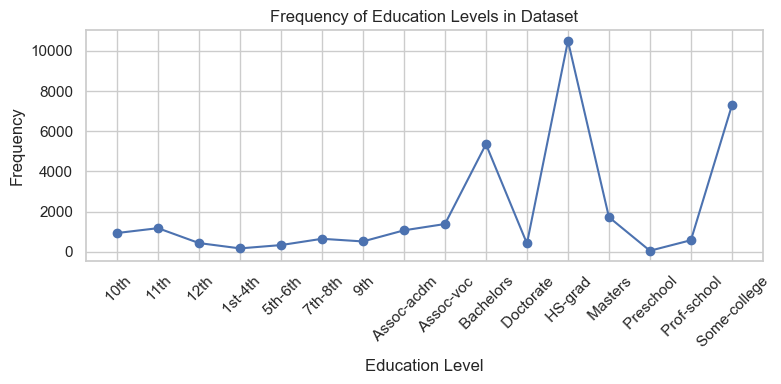

In [132]:
education_counts = data['education'].value_counts()

education_counts = education_counts.sort_index()

plt.figure(figsize=(8, 4))
plt.plot(education_counts.index, education_counts.values, marker='o', linestyle='-')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Frequency of Education Levels in Dataset')
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

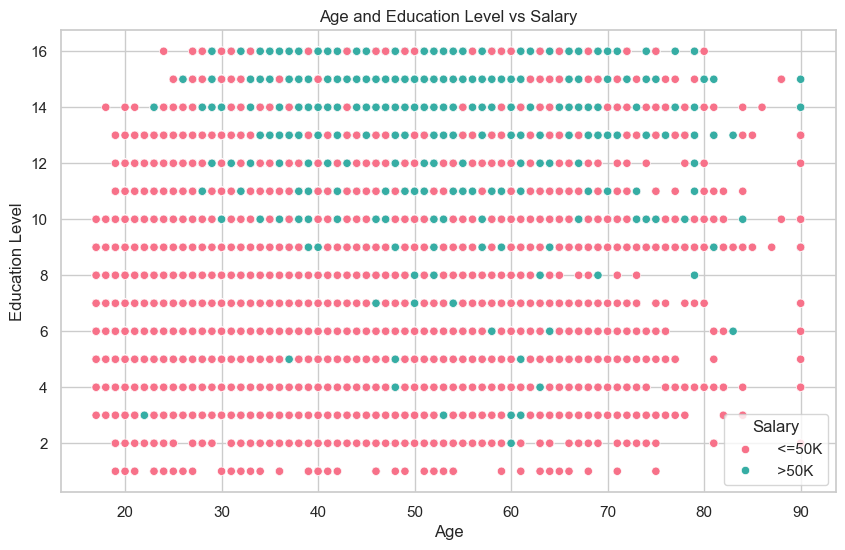

In [108]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='education-num', hue='salary', data=data, palette='husl')
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.title('Age and Education Level vs Salary')
plt.legend(title='Salary')
plt.grid(True)
plt.show()

In [28]:
import pandas as pd
from scipy import stats

# Load data
datal = 'data/adult.data'
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", 
    "marital-status", "occupation", "relationship", "race", "sex", 
    "capital-gain", "capital-loss", "hours-per-week", "native-country", 'salary']
data = pd.read_csv(datal, names=column_names)

# Remove outliers using z-score
z_scores = stats.zscore(data["capital-gain"])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3)
datak = data[filtered_entries]





In [33]:
top_10_percentile_value = data["capital-gain"].quantile(0.90)

# Filter out rows where capital-gain is in the top 10%
data_t = data[data["capital-gain"] <= top_10_percentile_value]

In [35]:
# Calculate z-scores for capital-gain
z_scores = stats.zscore(data["capital-gain"])

# Set threshold for z-score (e.g., trim top 5%)
threshold = 1.65  # Corresponds to approximately top 5% of the data

# Filter out rows where z-score exceeds threshold
data_z = data[z_scores <= threshold]

In [36]:
data_z.shape[0]

31854

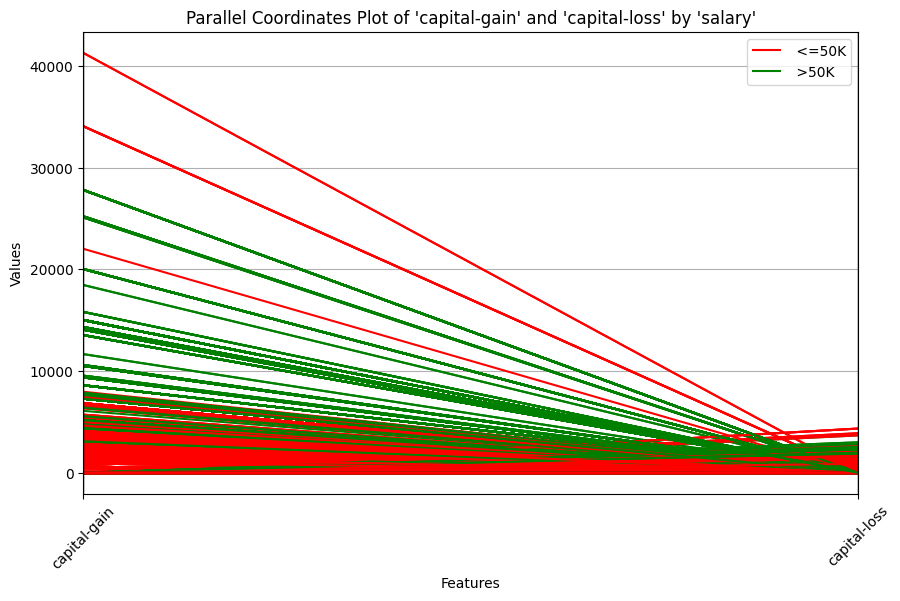

In [43]:
from pandas.plotting import parallel_coordinates

data = data[data['capital-gain']<87999]

plt.figure(figsize=(10, 6))
parallel_coordinates(data[["capital-gain", "capital-loss", "salary"]], "salary", color=["red", "green"])
plt.title("Parallel Coordinates Plot of 'capital-gain' and 'capital-loss' by 'salary'")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

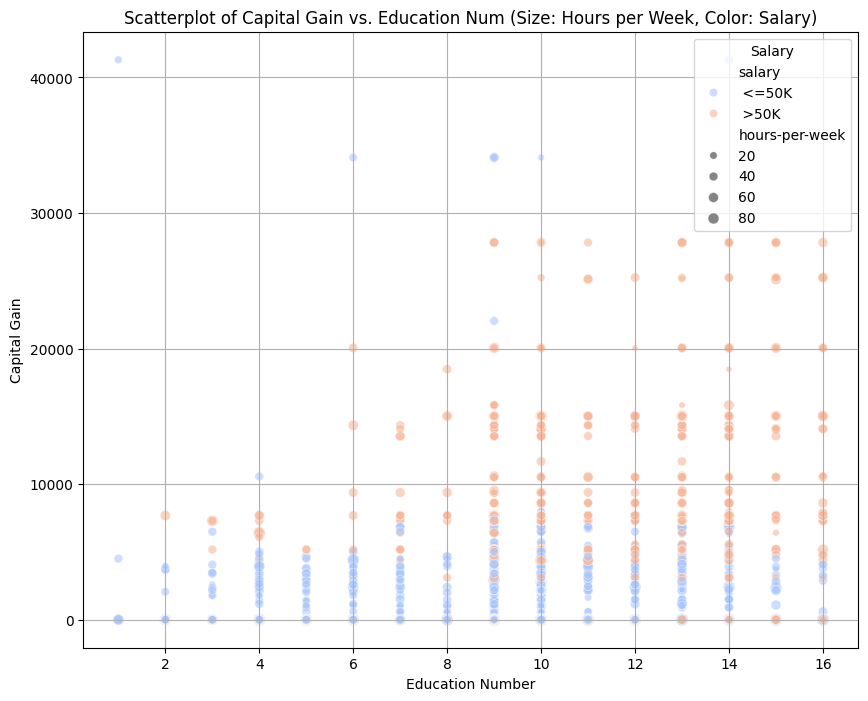

In [64]:
sizes = data['hours-per-week'] *1  # Adjust the scale as needed

# Plot the scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='education-num', y='capital-gain', size=sizes, hue='salary', data=data, palette='coolwarm', alpha=0.6)
plt.title('Scatterplot of Capital Gain vs. Education Num (Size: Hours per Week, Color: Salary)')
plt.xlabel('Education Number')
plt.ylabel('Capital Gain')
plt.legend(title='Salary', loc='upper right')
plt.grid(True)
plt.show()

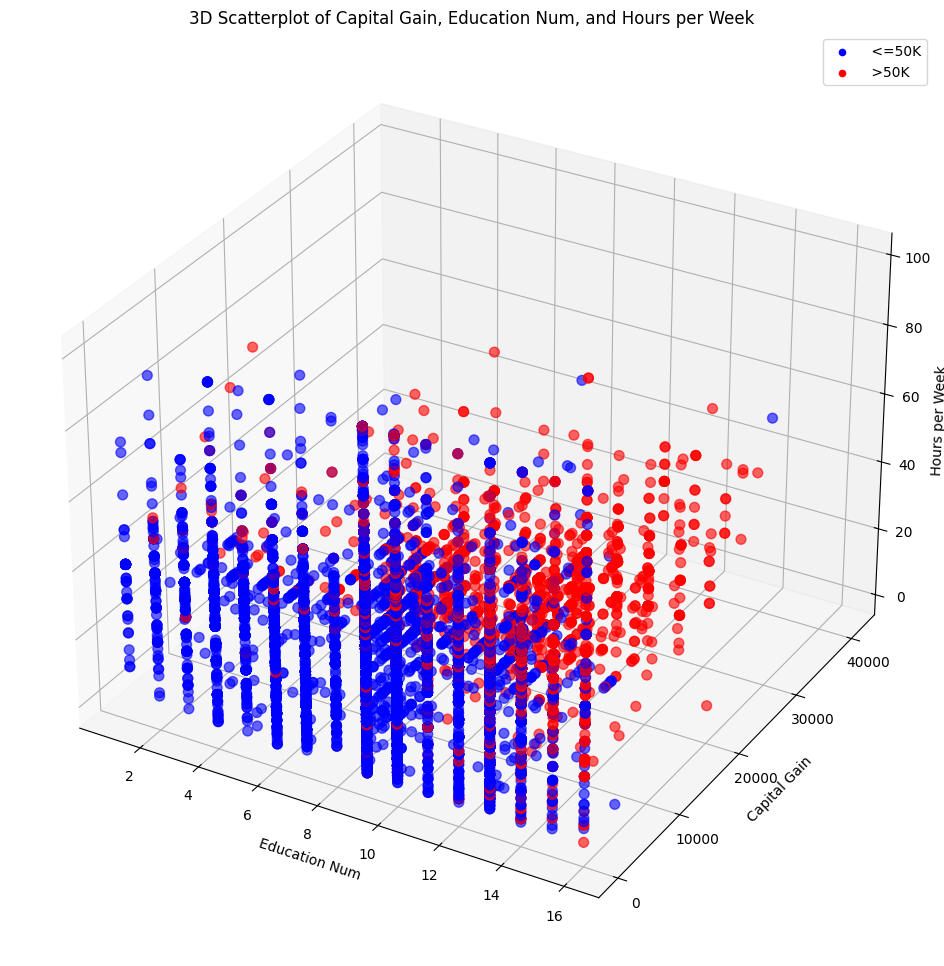

In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

colors = {' <=50K': 'blue', ' >50K': 'red'}

x = data['education-num']
y = data['capital-gain']
z = data['hours-per-week']
c = data['salary'].map(colors)

ax.scatter(x, y, z, c=c, s=50, alpha=0.6)

ax.set_xlabel('Education Num')
ax.set_ylabel('Capital Gain')
ax.set_zlabel('Hours per Week')
ax.set_title('3D Scatterplot of Capital Gain, Education Num, and Hours per Week')

for category, color in colors.items():
    ax.scatter([], [], [], c=color, label=category)
ax.legend()

plt.show()



In [5]:
import plotly.graph_objects as go

colors = {' <=50K': 'blue', ' >50K': 'red'}

traces = []
for category, color in colors.items():
    subset = data[data['salary'] == category]
    trace = go.Scatter3d(
        x=subset['education-num'],
        y=subset['capital-gain'],
        z=subset['hours-per-week'],
        mode='markers',
        marker=dict(
            size=5,
            color=color,
            opacity=0.6,
        ),
        name=category
    )
    traces.append(trace)

fig = go.Figure(data=traces)


fig.update_layout(
    title='Interactive 3D Scatterplot of Capital Gain, Education Num, and Hours per Week',
    scene=dict(
        xaxis=dict(title='Education Num'),
        yaxis=dict(title='Capital Gain'),
        zaxis=dict(title='Hours per Week')
    )
)

fig.update_layout(
    width=1000, 
    height=600, 
)
fig.show()


In [13]:
list(data['Continent'].unique())


['United States',
 'North America',
 'Asia',
 'Unknown',
 'Africa',
 'Europe',
 'South America']

In [15]:
import plotly.express as px

fig = px.choropleth(
    data, 
    locations='Continent', 
    locationmode='country names',  # Specify location mode
    color='salary',  # Color by salary category
    color_discrete_map={'<=50K': 'blue', '>50K': 'red'},  # Define colors
    labels={'Salary': 'Salary Category'},  # Labels
    title='Salary Distribution by Continent'
)

# Show the plot
fig.show()

/Users/ardakocaman/Documents/Development/flask-env/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [20]:
import pandas as pd
import plotly.express as px

ratio_df = data.groupby('native-country')['salary'].value_counts(normalize=True).unstack(fill_value=0)
ratio_df['Ratio'] = ratio_df[' >50K'] / (ratio_df[' <=50K'] + ratio_df[' >50K'])

ratio_df.reset_index(inplace=True)

fig = px.choropleth(
    ratio_df,
    locations='native-country',  
    locationmode='country names',  
    color='Ratio', 
    color_continuous_scale='viridis',  
    hover_name='native-country',  
    labels={'Ratio': 'Ratio of >50K Salaries'},  
    title='Ratio of >50K Salaries by Native Country'  
)

fig.show()


In [21]:
ratio_df['Ratio']

0     0.250429
1     0.368421
2     0.322314
3     0.266667
4     0.033898
5     0.263158
6     0.028571
7     0.142857
8     0.084906
9     0.333333
10    0.413793
11    0.321168
12    0.275862
13    0.046875
14    0.090909
15    0.000000
16    0.076923
17    0.300000
18    0.230769
19    0.400000
20    0.418605
21    0.208333
22    0.342466
23    0.123457
24    0.387097
25    0.111111
26    0.051322
27    0.058824
28    0.000000
29    0.064516
30    0.308081
31    0.200000
32    0.108108
33    0.105263
34    0.250000
35    0.200000
36    0.392157
37    0.166667
38    0.105263
39    0.245835
40    0.074627
41    0.375000
Name: Ratio, dtype: float64

In [22]:
data.shape[0]

32561